In [42]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import os 
import netCDF4 as nc
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 1) Data Visualization

### Import raw data (export and import volumes)

In [43]:

rawData = pd.read_csv("./tradeData.csv") 
rawData

domain                    domainCode  areaCode         area  \
0         TCL  Crops and livestock products         4  Afghanistan   
1         TCL  Crops and livestock products         4  Afghanistan   
2         TCL  Crops and livestock products         4  Afghanistan   
3         TCL  Crops and livestock products         4  Afghanistan   
4         TCL  Crops and livestock products         4  Afghanistan   
...       ...                           ...       ...          ...   
111818    TCL  Crops and livestock products       716     Zimbabwe   
111819    TCL  Crops and livestock products       716     Zimbabwe   
111820    TCL  Crops and livestock products       716     Zimbabwe   
111821    TCL  Crops and livestock products       716     Zimbabwe   
111822    TCL  Crops and livestock products       716     Zimbabwe   

        elementCode          element  itemCode          item  yearCode  year  \
0              5610  Import Quantity       112  Maize (corn)      1961  1961   
1              5610  Import Quantity       112  Maize (corn)      1962  1962   
2              5610  Import Quantity       112  Maize (corn)      1963  1963   
3              5610  Import Quantity       112  Maize (corn)      1964  1964   
4              5610  Import Quantity       112  Maize (corn)      1965  1965   
...             ...              ...       ...           ...       ...   ...   
111818         5922     Export Value       111         Wheat      2016  2016   
111819         5922     Export Value       111         Wheat      2017  2017   
111820         5922     Export Value       111         Wheat      2018  2018   
111821         5922     Export Value       111         Wheat      2019  2019   
111822         5922     Export Value       111         Wheat      2020  2020   

            unit   value flag flagDesc  
0         tonnes     NaN  NaN      NaN  
1         tonnes     NaN  NaN      NaN  
2         tonnes     NaN  NaN      NaN  
3         tonnes     NaN  NaN      NaN  
4         tonnes     NaN  NaN      NaN  
...          ...     ...  ...      ...  
111818  1000 US$     NaN  NaN      NaN  
111819  1000 US$  5280.0  NaN      NaN  
111820  1000 US$    10.0  NaN      NaN  
111821  1000 US$   255.0  NaN      NaN  
111822  1000 US$  2466.0  NaN      NaN  

[111823 rows x 14 columns]

# 2) Getting the data in and organized

In [44]:
print("How many years we have: ", len(np.unique(rawData['year'])))
print("How many countries we have: ", len(np.unique(rawData['area'])))
print("Our columns are : ")
for col in rawData.columns:
    print(col)

How many years we have:  60
How many countries we have:  203
Our columns are : 
domain
domainCode
areaCode
area
elementCode
element
itemCode
item
yearCode
year
unit
value
flag
flagDesc


### Visualizations

<AxesSubplot:title={'center':'Soy Exporters Rolling Mean'}, xlabel='year'>

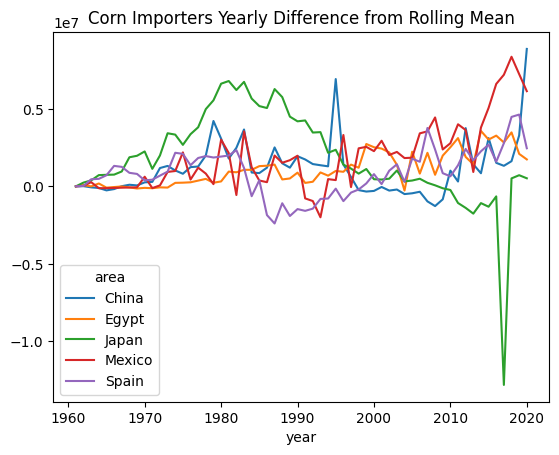

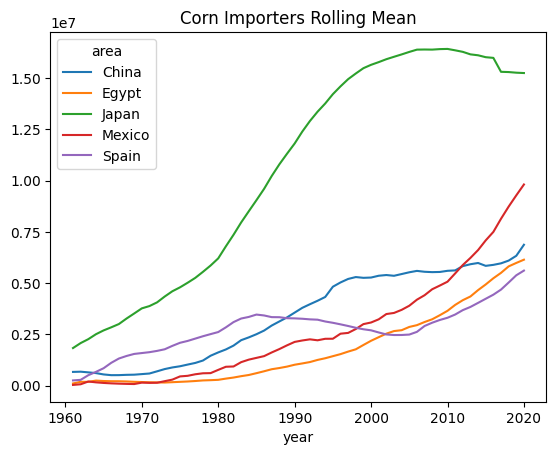

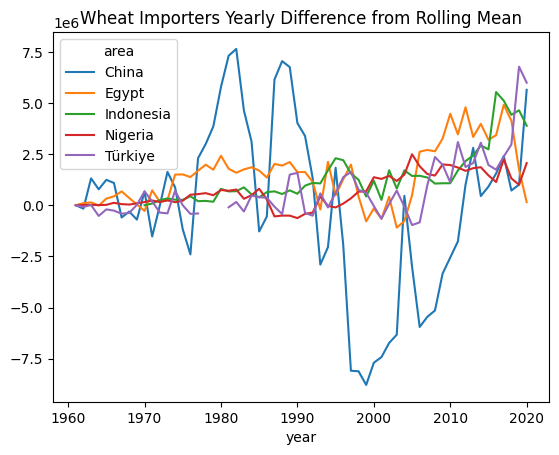

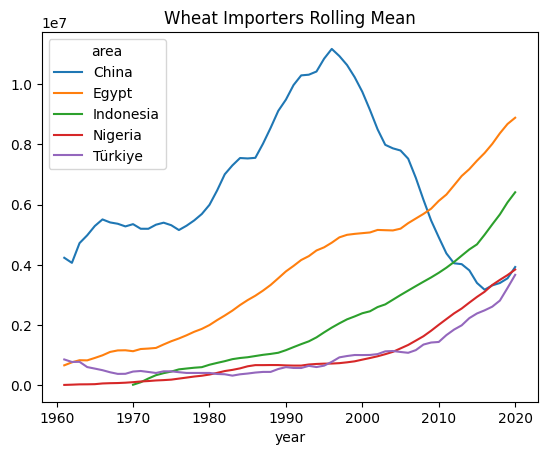

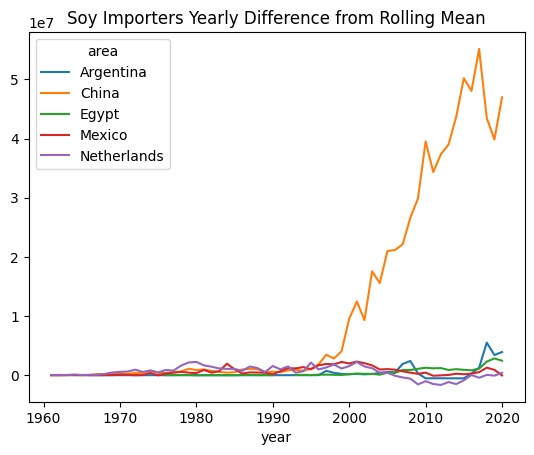

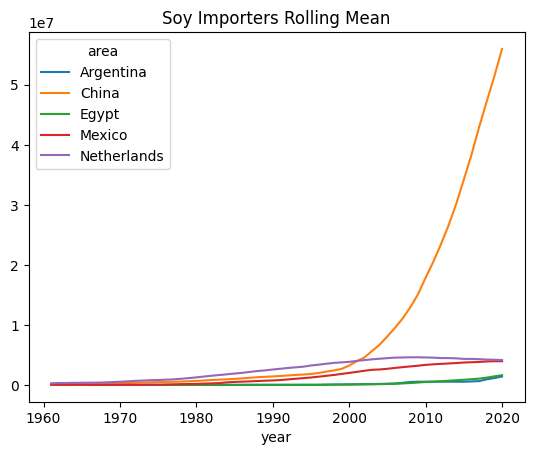

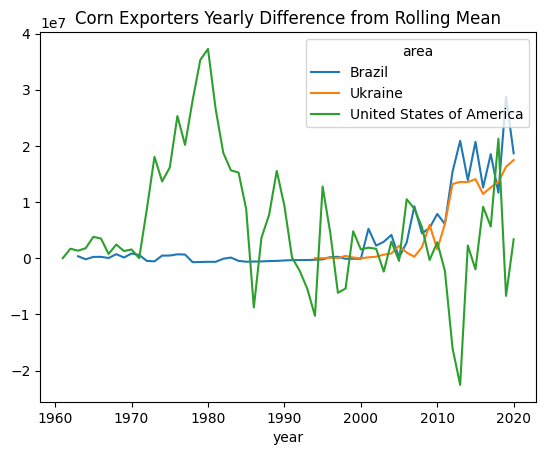

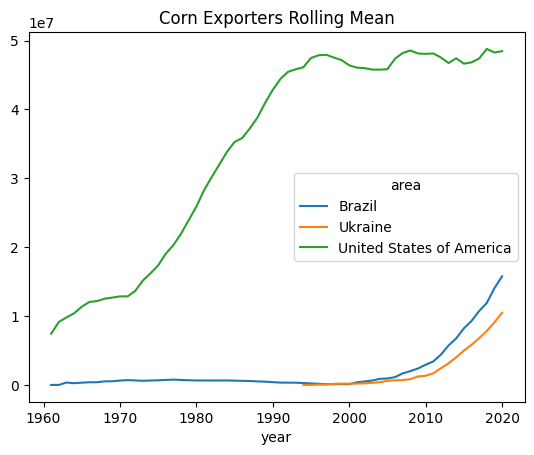

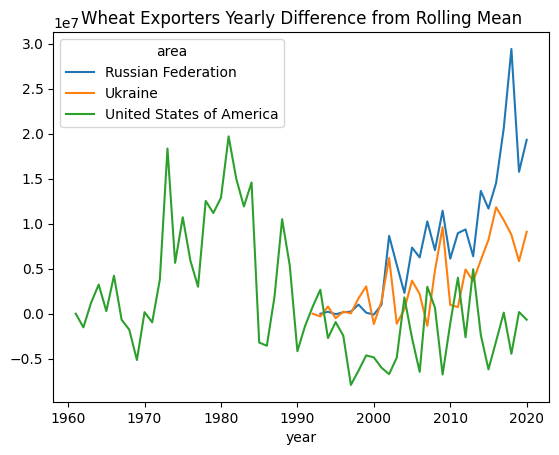

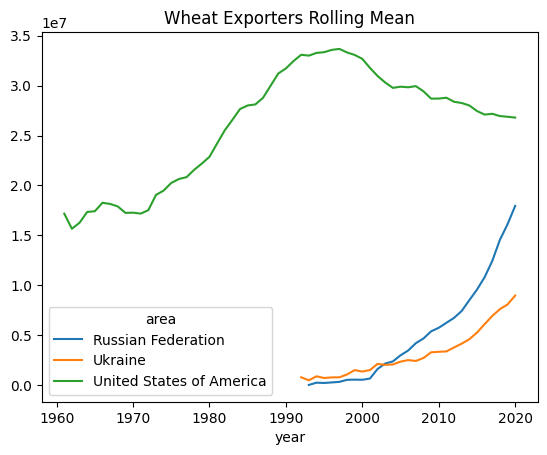

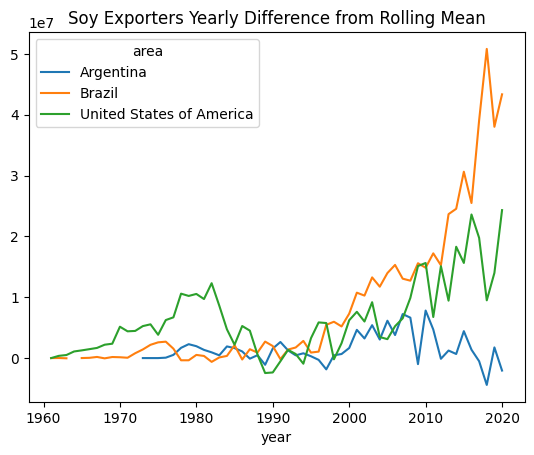

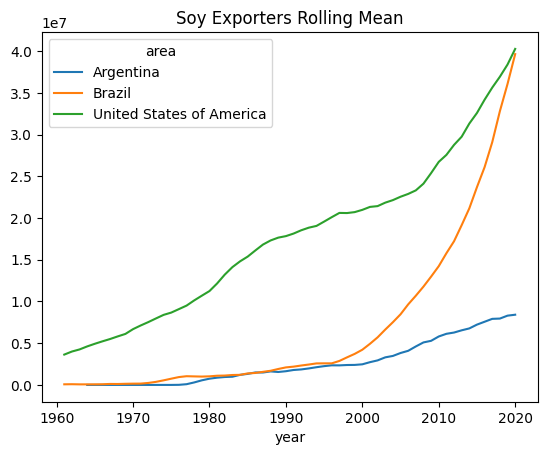

In [45]:
#groupedData = rawData.groupby('area' , 'item' , 'element')['value'].mean()
groupedData = rawData.groupby(['area', 'element', 'item'])['value']

# calculate a moving average for each group of grouped data, add these calculations as columns in original data
rawData['movAvg']= groupedData.transform(lambda x: x.rolling(20, 1).mean()) # 20 year rolling mean, could change this
rawData['diffFromAvg']= rawData['value'] - rawData['movAvg']
rawData.to_csv("movingAverage.csv")

## START VISUALIZING BY ITEM / ELEMENT (i.e. Corn, Imports)
importQuantityData = rawData[(rawData["element"] == "Import Quantity")]
exportQuantityData = rawData[(rawData["element"] == "Export Quantity")]

## CORN IMPORTS

# take a segement of the data set--> corn import quantity
cornImports = importQuantityData[(importQuantityData["item"] == "Maize (corn)")]

#cornImports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot()

topCornImporters = cornImports[(cornImports['area'] == "Mexico") | (cornImports['area'] == "Egypt") | (cornImports['area'] == "China") | (cornImports['area'] == "Japan") | (cornImports['area'] == "Spain")]
topCornImporters.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot(title="Corn Importers Yearly Difference from Rolling Mean")
topCornImporters.groupby(['year', 'area'])['movAvg'].mean().unstack().plot(title="Corn Importers Rolling Mean")

## WHEAT IMPORTS

# take a segement of the data set--> Wheat import quantity
wheatImports = importQuantityData[(importQuantityData["item"] == "Wheat")]

#wheatImports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot()

topWheatImporters = wheatImports[(wheatImports['area'] == "China") | (wheatImports['area'] == "Indonesia") | (wheatImports['area'] == "Nigeria") | (wheatImports['area'] == "Egypt") | (wheatImports['area'] == "Türkiye")]
topWheatImporters.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot(title="Wheat Importers Yearly Difference from Rolling Mean")
topWheatImporters.groupby(['year', 'area'])['movAvg'].mean().unstack().plot(title="Wheat Importers Rolling Mean")

## SOY IMPORTS

# take a segement of the data set--> soy import quantity
soyImports = importQuantityData[(importQuantityData["item"] == "Soya beans")]

#soyImports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot()

topSoyImporters = soyImports[(soyImports['area'] == "China") | (soyImports['area'] == "Netherlands") | (soyImports['area'] == "Mexico") | (soyImports['area'] == "Egypt") | (soyImports['area'] == "Argentina")]
topSoyImporters.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot(title="Soy Importers Yearly Difference from Rolling Mean")
topSoyImporters.groupby(['year', 'area'])['movAvg'].mean().unstack().plot(title="Soy Importers Rolling Mean")

## CORN EXPORTS

# take a segement of the data set--> soy export quantity
cornExports = exportQuantityData[(exportQuantityData["item"] == "Maize (corn)")]

#cornImports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot()

topCornExports = cornExports[(cornExports['area'] == "United States of America") | (cornExports['area'] == "Brazil") | (cornExports['area'] == "Ukraine")]
topCornExports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot(title="Corn Exporters Yearly Difference from Rolling Mean")
topCornExports.groupby(['year', 'area'])['movAvg'].mean().unstack().plot(title="Corn Exporters Rolling Mean")

## WHEAT EXPORTS

# take a segement of the data set--> soy export quantity
wheatExports = exportQuantityData[(exportQuantityData["item"] == "Wheat")]

#wheatImports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot()

topWheatExports = wheatExports[(wheatExports['area'] == "United States of America") | (wheatExports['area'] == "Russian Federation") | (wheatExports['area'] == "Ukraine")]
topWheatExports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot(title="Wheat Exporters Yearly Difference from Rolling Mean")
topWheatExports.groupby(['year', 'area'])['movAvg'].mean().unstack().plot(title="Wheat Exporters Rolling Mean")

## SOY EXPORTS
# take a segement of the data set--> soy export quantity
soyExports = exportQuantityData[(exportQuantityData["item"] == "Soya beans")]

#soyExports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot()

topSoyExports = soyExports[(soyExports['area'] == "United States of America") | (soyExports['area'] == "Brazil") | (soyExports['area'] == "Argentina")]
topSoyExports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot(title="Soy Exporters Yearly Difference from Rolling Mean")
topSoyExports.groupby(['year', 'area'])['movAvg'].mean().unstack().plot(title="Soy Exporters Rolling Mean")



# pd.pivot_table(cornImports.reset_index(),
#                index='year', columns='area', values='value'
#               ).plot(subplots=True, layout=(20,11))

# QUESTIONS with my moving average: 1) how to handle missing/zero values. Should I replace zeros? (2) I have a window of 10 right now... is that reasonable? Or is there a way to include all values to date? 



# Understanding the impacts of Export shocks on each country's imports
### What to do-> can we regress export anomalies for each commodity on each country's import anomalies and see which ones have the greatest correlation? 

In [81]:
# Code to regress a country's export anomaly on each country's import anomaly

## CORN ###

USCornExports = exportQuantityData[(exportQuantityData["area"] == "United States of America") & (exportQuantityData["item"] == "Maize (corn)")]

# create a dataset that links the US export variation to each import country's yearly data
cornEffectsData = cornImports.merge(USCornExports, right_on='year', left_on='year')
display(cornEffectsData)
cornEffectsData.to_csv("cornEffects.csv")

# group this new data set by import country
groupedCorn = cornEffectsData.groupby('area_x')

# create a new dataframe to hold each country's sensitivity to US corn export changes
d = {'area': [], 'diffFromAvg_y': [], 'year': [] }
# d = {'area': groupedCorn.groups.keys()}
regData = pd.DataFrame(data = d)


for g in groupedCorn.groups.keys():
    try:
        curr = groupedCorn.get_group(g)
        lm = smf.ols('diffFromAvg_x ~ diffFromAvg_y + year', data = curr, missing='drop').fit()
        lm.summary()

        regData.loc[len(regData.index)] = [g, lm.params['diffFromAvg_y'], lm.params['year']] # add regression results for each country


        # 1) pull out coefficients on diffFromAvg_y and year, create a row in a new dataset for country and coefficients
        # 2) repeat with a 1 year lag between exports and imports
        # 3) expand to other commodities and global produciton values

    except:
        print("Regression failed for country: " + str(g))

display(regData)
regData.to_csv('cornRegression.csv')

# other option is using fixed effects by country but seems less meaningful
# lm = smf.ols('diffFromAvg_x ~ diffFromAvg_y + year + C(area_x)', data = cornEffectsData, missing='drop').fit()
# lm.summary()








domain_x                  domainCode_x  areaCode_x  \
0          TCL  Crops and livestock products           4   
1          TCL  Crops and livestock products           8   
2          TCL  Crops and livestock products          12   
3          TCL  Crops and livestock products          24   
4          TCL  Crops and livestock products          28   
...        ...                           ...         ...   
10772      TCL  Crops and livestock products         862   
10773      TCL  Crops and livestock products         704   
10774      TCL  Crops and livestock products         887   
10775      TCL  Crops and livestock products         894   
10776      TCL  Crops and livestock products         716   

                                   area_x  elementCode_x        element_x  \
0                             Afghanistan           5610  Import Quantity   
1                                 Albania           5610  Import Quantity   
2                                 Algeria           5610  Import Quantity   
3                                  Angola           5610  Import Quantity   
4                     Antigua and Barbuda           5610  Import Quantity   
...                                   ...            ...              ...   
10772  Venezuela (Bolivarian Republic of)           5610  Import Quantity   
10773                            Viet Nam           5610  Import Quantity   
10774                               Yemen           5610  Import Quantity   
10775                              Zambia           5610  Import Quantity   
10776                            Zimbabwe           5610  Import Quantity   

       itemCode_x        item_x  yearCode_x  year  ...        element_y  \
0             112  Maize (corn)        1961  1961  ...  Export Quantity   
1             112  Maize (corn)        1961  1961  ...  Export Quantity   
2             112  Maize (corn)        1961  1961  ...  Export Quantity   
3             112  Maize (corn)        1961  1961  ...  Export Quantity   
4             112  Maize (corn)        1961  1961  ...  Export Quantity   
...           ...           ...         ...   ...  ...              ...   
10772         112  Maize (corn)        2020  2020  ...  Export Quantity   
10773         112  Maize (corn)        2020  2020  ...  Export Quantity   
10774         112  Maize (corn)        2020  2020  ...  Export Quantity   
10775         112  Maize (corn)        2020  2020  ...  Export Quantity   
10776         112  Maize (corn)        2020  2020  ...  Export Quantity   

       itemCode_y        item_y yearCode_y  unit_y     value_y flag_y  \
0             112  Maize (corn)       1961  tonnes   7452500.0    NaN   
1             112  Maize (corn)       1961  tonnes   7452500.0    NaN   
2             112  Maize (corn)       1961  tonnes   7452500.0    NaN   
3             112  Maize (corn)       1961  tonnes   7452500.0    NaN   
4             112  Maize (corn)       1961  tonnes   7452500.0    NaN   
...           ...           ...        ...     ...         ...    ...   
10772         112  Maize (corn)       2020  tonnes  51838933.0    NaN   
10773         112  Maize (corn)       2020  tonnes  51838933.0    NaN   
10774         112  Maize (corn)       2020  tonnes  51838933.0    NaN   
10775         112  Maize (corn)       2020  tonnes  51838933.0    NaN   
10776         112  Maize (corn)       2020  tonnes  51838933.0    NaN   

      flagDesc_y    movAvg_y diffFromAvg_y  
0            NaN   7452500.0           0.0  
1            NaN   7452500.0           0.0  
2            NaN   7452500.0           0.0  
3            NaN   7452500.0           0.0  
4            NaN   7452500.0           0.0  
...          ...         ...           ...  
10772        NaN  48466063.2     3372869.8  
10773        NaN  48466063.2     3372869.8  
10774        NaN  48466063.2     3372869.8  
10775        NaN  48466063.2     3372869.8  
10776        NaN  48466063.2     3372869.8  

[10777 rows x 31 columns]

/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


7.287634335659978e-05


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library

Regression failed for country: Nauru
Regression failed for country: Niue


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site

Regression failed for country: Tuvalu


area  diffFromAvg_y          year
0            Afghanistan       0.000073    183.927659
1                Albania       0.000145    674.989973
2                Algeria      -0.002274  28238.198305
3                 Angola       0.001409  -1332.661876
4    Antigua and Barbuda      -0.000006      0.458773
..                   ...            ...           ...
195             Viet Nam       0.023998  81500.978984
196                Yemen      -0.000805   5450.220930
197         Yugoslav SFR       0.003832   1924.763138
198               Zambia       0.000520  -1937.613940
199             Zimbabwe      -0.001547   1786.517057

[200 rows x 3 columns]

KeyboardInterrupt: 

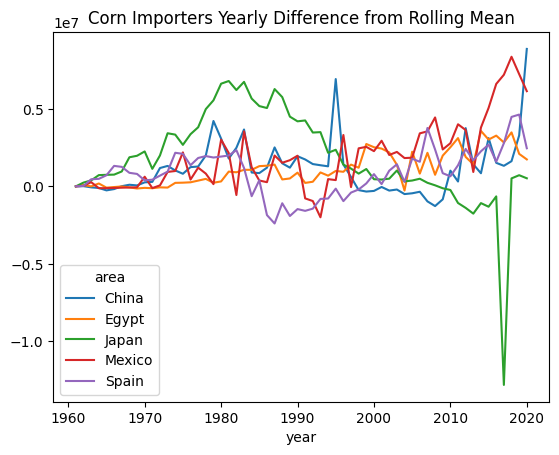

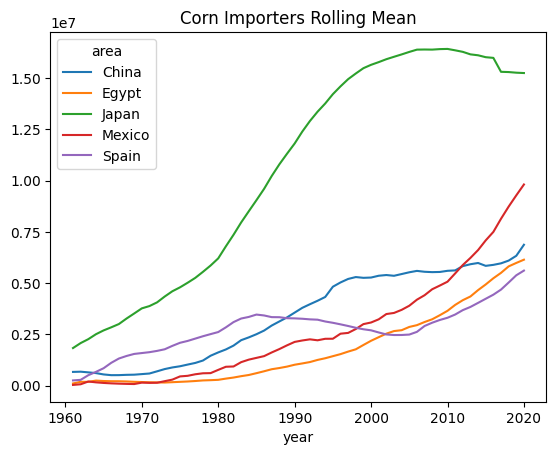

In [47]:
# ## HAVEN'T STARTED WORKING ON THIS YET! JUST A BUNCH OF SCRATCH CODE
# # REGRESSION ATTEMPTS-- what I need to do--> create a dataset for each commodity with major exporters/importers by country. 
# # Can we predict import country X's diffFromAvg based on export country Y's diff from avg? 

# # Steps: 1) Create the data set (how to arrange by country?)

# ## START VISUALIZING BY ITEM / ELEMENT (i.e. Corn, Imports)
# importQuantityData = rawData[(rawData["element"] == "Import Quantity")]
# exportQuantityData = rawData[(rawData["element"] == "Export Quantity")]

# ## CORN IMPORTS

# # take a segement of the data set--> corn import quantity
# cornImports = importQuantityData[(importQuantityData["item"] == "Maize (corn)")]

# #cornImports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot()

# topCornImporters = cornImports[(cornImports['area'] == "Mexico") | (cornImports['area'] == "Egypt") | (cornImports['area'] == "China") | (cornImports['area'] == "Japan") | (cornImports['area'] == "Spain")]
# topCornImporters.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot(title="Corn Importers Yearly Difference from Rolling Mean")
# topCornImporters.groupby(['year', 'area'])['movAvg'].mean().unstack().plot(title="Corn Importers Rolling Mean")

# ## WHEAT IMPORTS

# lm = smf.ols('diffFromAvg ~ year + element ', data = rawData).fit()
# lm.summary()